In [1]:
import pandas as pd

In [2]:
file_path='D:\ML\melb_data.csv'

In [3]:
mel_data=pd.read_csv(file_path)

In [4]:
mel_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [5]:
mel_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [6]:
mel_data=mel_data.dropna(axis=0)


### There are many ways to select a subset of your data.

    1)Dot notation, which we use to select the "prediction target"
    2)Selecting with a column list, which we use to select the "features"

### Selecting the prediction target
You can pull out a variable with dot-notation. This single column is stored in a Series, which is broadly like a DataFrame with only a single column of data.

We'll use the dot notation to select the column we want to predict, which is called the prediction target. By convention, the prediction target is called y. So the code we need to save the house prices in the Melbourne data is


In [7]:
y=mel_data.Price

### Choosing "Features"
he columns that are inputted into our model (and later used to make predictions) are called "features." In our case, those would be the columns used to determine the home price. Sometimes, you will use all columns except the target as features. Other times you'll be better off with fewer features.

For now, we'll build a model with only a few features. Later on you'll see how to iterate and compare models built with different features.

We select multiple features by providing a list of column names inside brackets. Each item in that list should be a string (with quotes).

In [8]:
mel_features=['Rooms','Bathroom','Landsize','BuildingArea','YearBuilt','Lattitude','Longtitude']

In [9]:
X=mel_data[mel_features]

In [10]:
X.describe()

,Rooms,Bathroom,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,141.568645,1964.081988,-37.807904,144.990201
std,0.971079,0.711362,897.449881,90.834824,38.105673,0.075850,0.099165
min,1.000000,1.000000,0.000000,0.000000,1196.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,91.000000,1940.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,124.000000,1970.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,170.000000,2000.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,3112.000000,2018.000000,-37.457090,145.526350


In [11]:
X.head()

,Rooms,Bathroom,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
1,2,1.0,156.0,79.0,1900.0,-37.8079,144.9934
2,3,2.0,134.0,150.0,1900.0,-37.8093,144.9944
4,4,1.0,120.0,142.0,2014.0,-37.8072,144.9941
6,3,2.0,245.0,210.0,1910.0,-37.8024,144.9993
7,2,1.0,256.0,107.0,1890.0,-37.8060,144.9954


### Building the model
You will use the scikit-learn library to create your models. When coding, this library is written as sklearn, as you will see in the sample code. Scikit-learn is easily the most popular library for modeling the types of data typically stored in DataFrames.

The steps to building and using a model are:

    Define: What type of model will it be? A decision tree? Some other           type of model? Some other parameters of the model type are specified         too.

    Fit: Capture patterns from provided data. This is the heart of modeling.

    Predict: Just what it sounds like

    Evaluate: Determine how accurate the model's predictions are.

Here is an example of defining a decision tree model with scikit-learn and fitting it with the features and target variable.


In [12]:
from sklearn.tree import DecisionTreeRegressor
mel_model=DecisionTreeRegressor(random_state=1)
mel_model.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [13]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(mel_model.predict(X.head()))

Making predictions for the following 5 houses:
   Rooms  Bathroom  Landsize  BuildingArea  YearBuilt  Lattitude  Longtitude
1      2       1.0     156.0          79.0     1900.0   -37.8079    144.9934
2      3       2.0     134.0         150.0     1900.0   -37.8093    144.9944
4      4       1.0     120.0         142.0     2014.0   -37.8072    144.9941
6      3       2.0     245.0         210.0     1910.0   -37.8024    144.9993
7      2       1.0     256.0         107.0     1890.0   -37.8060    144.9954
The predictions are
[1035000. 1465000. 1600000. 1876000. 1636000.]


 Measuring model quality is the key to iteratively improving your models.
### What is Model Validation
You'll want to evaluate almost every model you ever build. In most (though not all) applications, the relevant measure of model quality is predictive accuracy. In other words, will the model's predictions be close to what actually happens.

Many people make a huge mistake when measuring predictive accuracy. They make predictions with their training data and compare those predictions to the target values in the training data. You'll see the problem with this approach and how to solve it in a moment, but let's think about how we'd do this first.

You'd first need to summarize the model quality into an understandable way. If you compare predicted and actual home values for 10,000 houses, you'll likely find mix of good and bad predictions. Looking through a list of 10,000 predicted and actual values would be pointless. We need to summarize this into a single metric.

There are many metrics for summarizing model quality, but we'll start with one called Mean Absolute Error (also called MAE). Let's break down this metric starting with the last word, error.

The prediction error for each house is:

error=actual−predicted
So, if a house cost \$150,000 and you predicted it would cost \$100,000 the error is \$50,000.

With the MAE metric, we take the absolute value of each error. This converts each error to a positive number. We then take the average of those absolute errors. This is our measure of model quality. In plain English, it can be said as

On average, our predictions are off by about X.

In [14]:
from sklearn.metrics import mean_absolute_error
predicted_home_prices=mel_model.predict(X)
mean_absolute_error(y,predicted_home_prices)

434.71594577146544

### The Problem with "In-Sample" Score

The measure we just computed can be called an "in-sample" score. We used a single "sample" of houses for both building the model and evaluating it. Here's why this is bad.

Imagine that, in the large real estate market, door color is unrelated to home price.

However, in the sample of data you used to build the model, all homes with green doors were very expensive. The model's job is to find patterns that predict home prices, so it will see this pattern, and it will always predict high prices for homes with green doors.

Since this pattern was derived from the training data, the model will appear accurate in the training data.

But if this pattern doesn't hold when the model sees new data, the model would be very inaccurate when used in practice.

Since models' practical value come from making predictions on new data, we measure performance on data that wasn't used to build the model. The most straightforward way to do this is to exclude some data from the model-building process, and then use those to test the model's accuracy on data it hasn't seen before. This data is called validation data.

The scikit-learn library has a function train_test_split to break up the data into two pieces. We'll use some of that data as training data to fit the model, and we'll use the other data as validation data to calculate mean_absolute_error.

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
mel_model1=DecisionTreeRegressor(random_state=1)
mel_model1.fit(X_train,y_train)
val_predictions=mel_model1.predict(X_test)
mean_absolute_error(y_test,val_predictions)

262494.3027759845

Your mean absolute error for the in-sample data was about 500 dollars. Out-of-sample it is more than 250,000 dollars.

This is the difference between a model that is almost exactly right, and one that is unusable for most practical purposes. As a point of reference, the average home value in the validation data is 1.1 million dollars. So the error in new data is about a quarter of the average home value.

### Experimenting with Different Models

Now that you have a reliable way to measure model accuracy, you can experiment with alternative models and see which gives the best predictions. But what alternatives do you have for models?

You can see in scikit-learn's documentation that the decision tree model has many options (more than you'll want or need for a long time). The most important options determine the tree's depth. Recall from the first lesson in this micro-course that a tree's depth is a measure of how many splits it makes before coming to a prediction. This is a relatively shallow tree
http://i.imgur.com/R3ywQsR.png

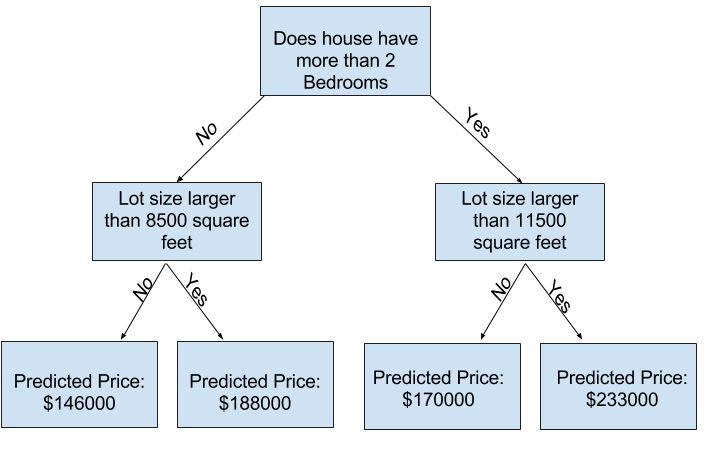

In practice, it's not uncommon for a tree to have 10 splits between the top level (all houses) and a leaf. As the tree gets deeper, the dataset gets sliced up into leaves with fewer houses. If a tree only had 1 split, it divides the data into 2 groups. If each group is split again, we would get 4 groups of houses. Splitting each of those again would create 8 groups. If we keep doubling the number of groups by adding more splits at each level, we'll have $2^{10}$ groups of houses by the time we get to the 10th level. That's 1024 leaves.

When we divide the houses amongst many leaves, we also have fewer houses in each leaf. Leaves with very few houses will make predictions that are quite close to those homes' actual values, but they may make very unreliable predictions for new data (because each prediction is based on only a few houses).

This is a phenomenon called overfitting, where a model matches the training data almost perfectly, but does poorly in validation and other new data. On the flip side, if we make our tree very shallow, it doesn't divide up the houses into very distinct groups.

At an extreme, if a tree divides houses into only 2 or 4, each group still has a wide variety of houses. Resulting predictions may be far off for most houses, even in the training data (and it will be bad in validation too for the same reason). When a model fails to capture important distinctions and patterns in the data, so it performs poorly even in training data, that is called underfitting.

Since we care about accuracy on new data, which we estimate from our validation data, we want to find the sweet spot between underfitting and overfitting. Visually, we want the low point of the (red) validation curve in



http://i.imgur.com/2q85n9s.png
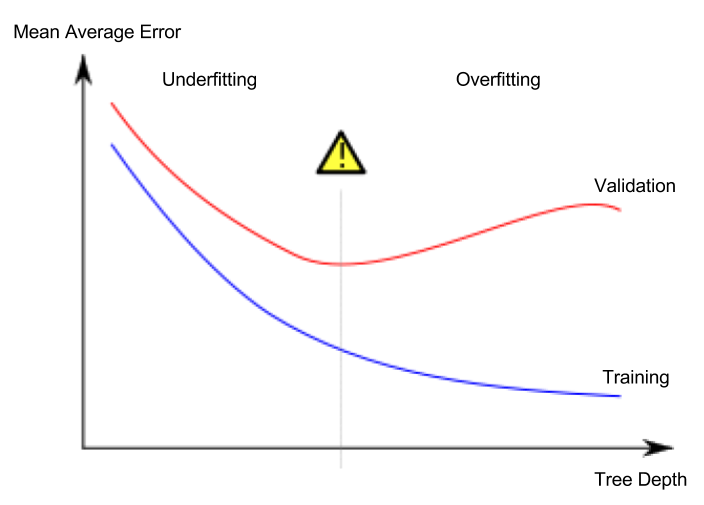

### max_leaf_nodes
There are a few alternatives for controlling the tree depth, and many allow for some routes through the tree to have greater depth than other routes. But the max_leaf_nodes argument provides a very sensible way to control overfitting vs underfitting. The more leaves we allow the model to make, the more we move from the underfitting area in the above graph to the overfitting area.

We can use a utility function to help compare MAE scores from different values for max_leaf_nodes:

In [16]:
def get_mae(max_leaf_nodes,X_train,X_test,y_train,y_test):
    model=DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes,random_state=0)
    model.fit(X_train,y_train)
    preds_val=model.predict(X_test)
    mae=mean_absolute_error(y_test,preds_val)
    return mae

We can use a for-loop to compare the accuracy of models built with different values for max_leaf_nodes.

In [17]:
c={}
for max_leaf_nodes in [5,50,500,1000,2500,3000,5000,]:
    my_mae=get_mae(max_leaf_nodes,X_train,X_test,y_train,y_test)
    c[max_leaf_nodes]=my_mae
    
    print("Max leaf nodes:%d \t\t Mean Absolute Error: %d"%(max_leaf_nodes,my_mae))
best_tree_size=min(c,key=c.get)
print(best_tree_size)

Max leaf nodes:5 		 Mean Absolute Error: 347380
Max leaf nodes:50 		 Mean Absolute Error: 258171
Max leaf nodes:500 		 Mean Absolute Error: 243495
Max leaf nodes:1000 		 Mean Absolute Error: 247345
Max leaf nodes:2500 		 Mean Absolute Error: 254665
Max leaf nodes:3000 		 Mean Absolute Error: 254939
Max leaf nodes:5000 		 Mean Absolute Error: 254983
500


Of the options listed, 500 is the optimal number of leaves.

Here's the takeaway: Models can suffer from either:

    Overfitting: capturing spurious patterns that won't recur in the future, leading to less accurate predictions, or
    Underfitting: failing to capture relevant patterns, again leading to less accurate predictions.
We use validation data, which isn't used in model training, to measure a candidate model's accuracy. This lets us try many candidate models and keep the best one.

In [18]:
final_model=DecisionTreeRegressor(max_leaf_nodes=best_tree_size,random_state=0)
final_model.fit(X_train,y_train)
preds_val=final_model.predict(X_test)
final_mae=mean_absolute_error(y_test,preds_val)
final_mae

243495.96361790417